In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = './pf_1000_data/datasets/pf_results/'

for filename in os.listdir(folder_path):
    if 'average_beta' in filename and filename.endswith('.csv'):
        # Extract the location number from the filename
        location = filename.split('_')[0]
        
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Assume that the DataFrame has a 'time' column and a 'value' column
        # Modify the column names as needed
        plt.figure(figsize=(7, 4))
        plt.plot(df['Unnamed: 0'], df['0'])
        plt.title(f'Time Series Ending on 2024-03-30 for Location: {location}')
        plt.xlabel('Time')
        plt.ylabel('Beta')
        plt.grid(True)
        plt.show()


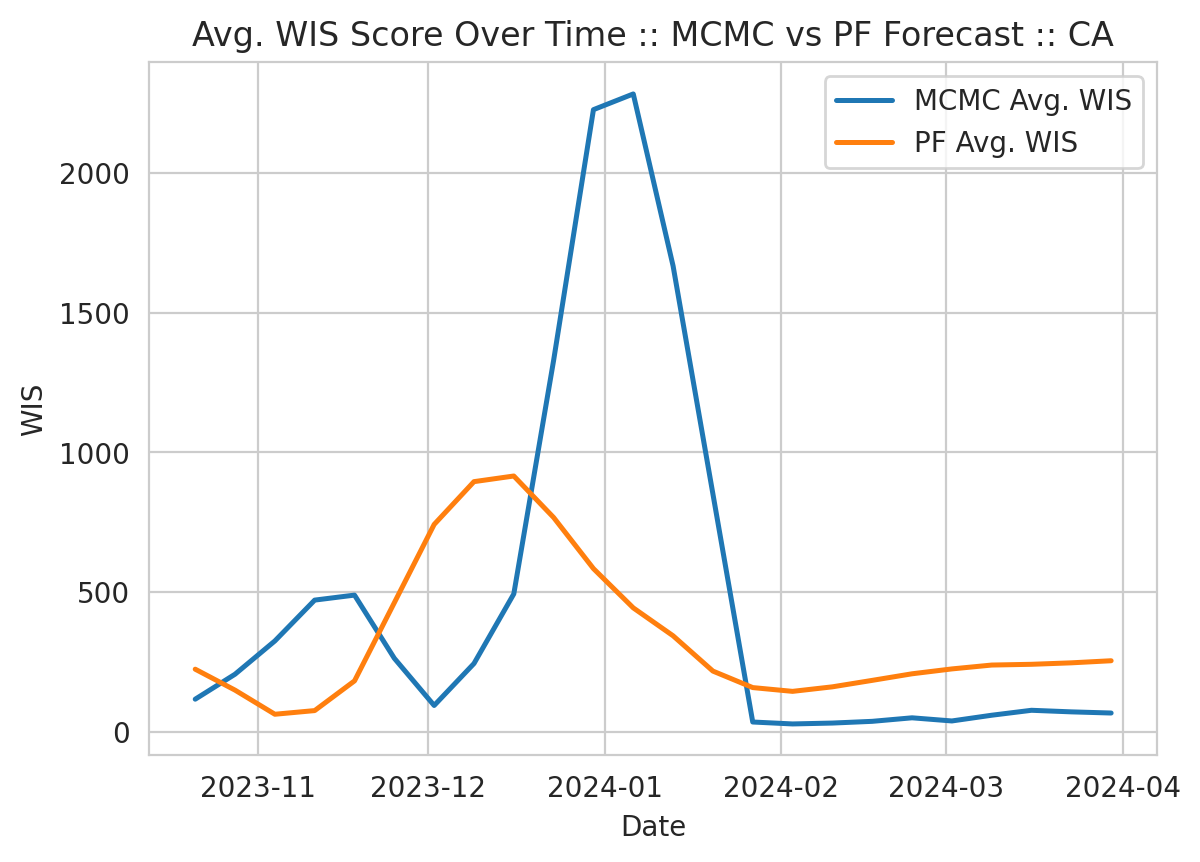

In [1]:
from mcmc_plotting import *

plot_state_comparison_avg(mcmc_csv_path='./mcmc_accuracy_results/CA.csv',
                          pf_csv_path='./pf_accuracy_results/CA.csv',
                          save=True)

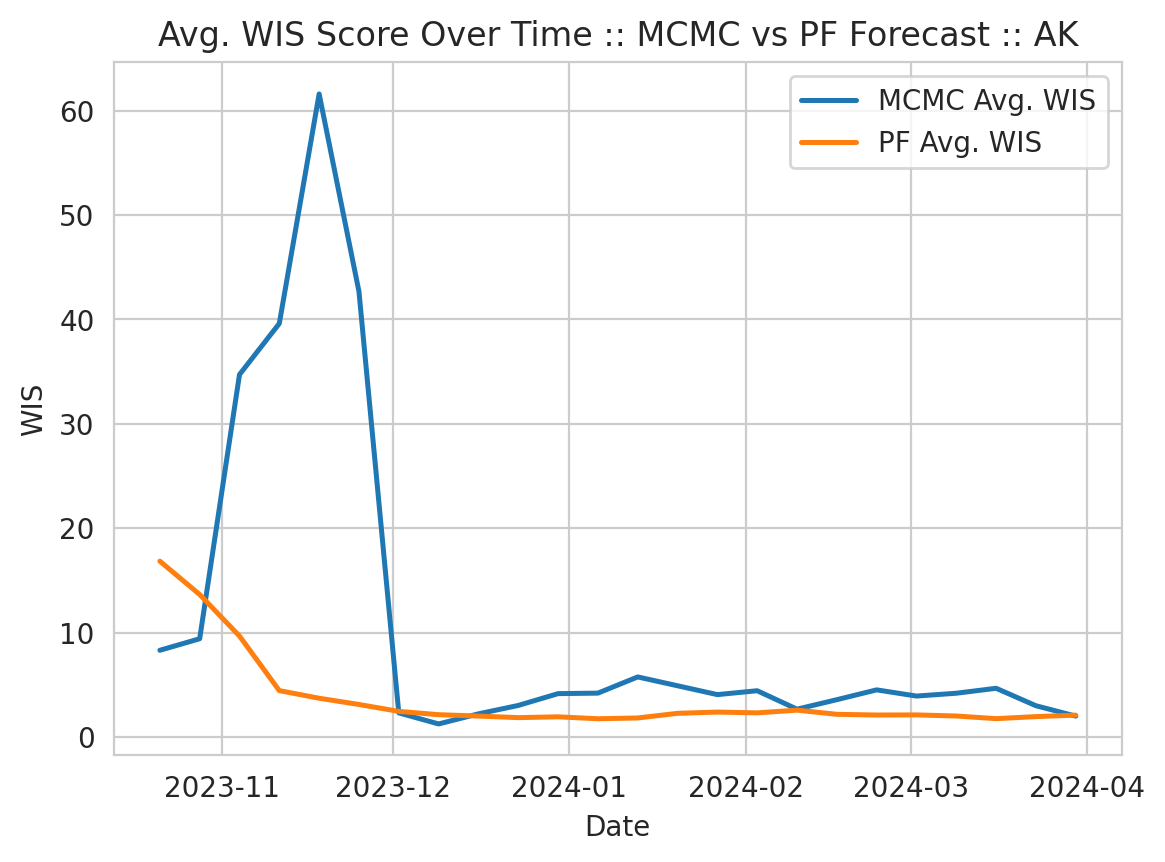

In [2]:
from mcmc_plotting import *

state = 'AK'
plot_state_comparison_avg(mcmc_csv_path=f'./mcmc_accuracy_results/{state}.csv',
                          pf_csv_path=f'./pf_accuracy_results/{state}.csv')

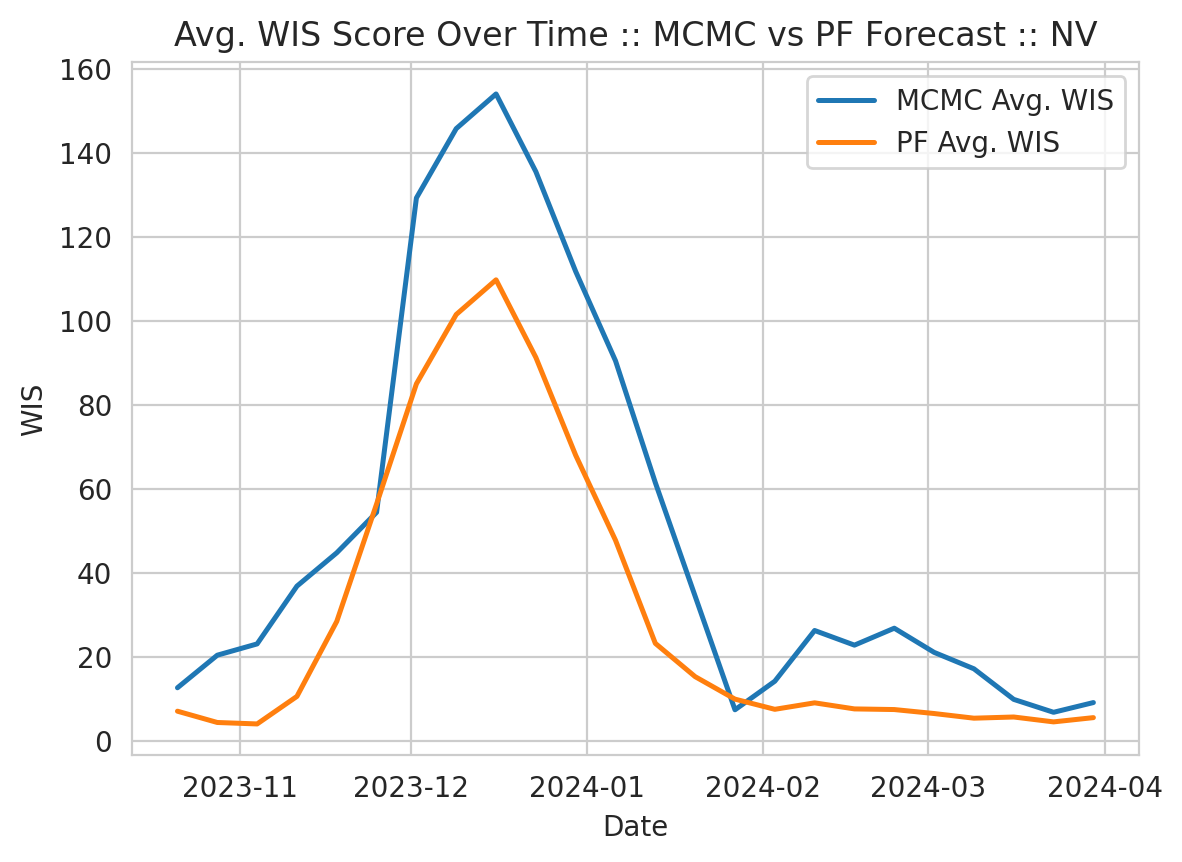

In [4]:
from mcmc_plotting import *

state = 'NV'
plot_state_comparison_avg(mcmc_csv_path=f'./mcmc_accuracy_results/{state}.csv',
                          pf_csv_path=f'./pf_accuracy_results/{state}.csv',
                          save=True)

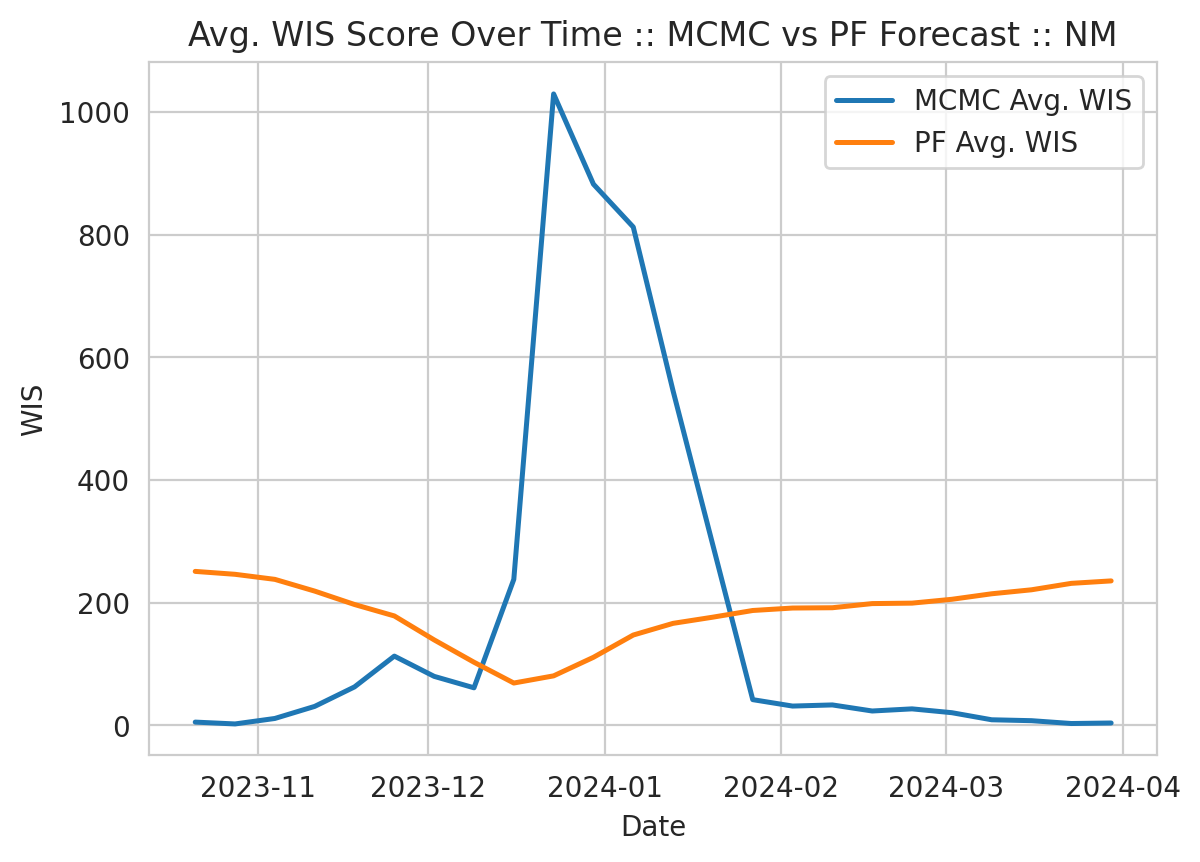

In [5]:
from mcmc_plotting import *

state = 'NM'
plot_state_comparison_avg(mcmc_csv_path=f'./mcmc_accuracy_results/{state}.csv',
                          pf_csv_path=f'./pf_accuracy_results/{state}.csv')

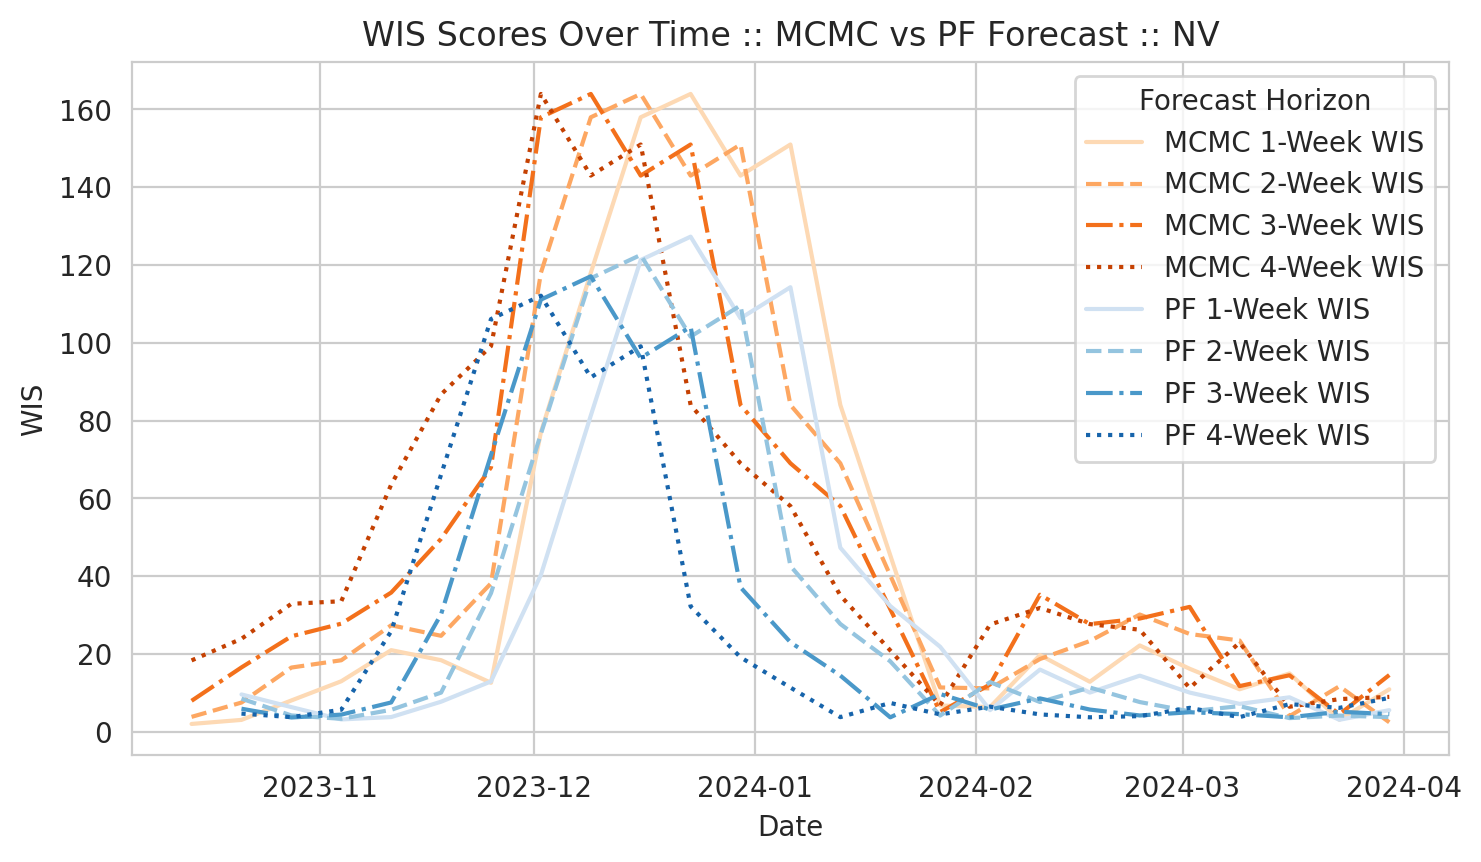

In [9]:
from mcmc_plotting import *

state = 'NV'
plot_state_comparison(mcmc_csv_path=f'./mcmc_accuracy_results/{state}.csv',
                      pf_csv_path=f'./pf_accuracy_results/{state}.csv',
                      save=True)

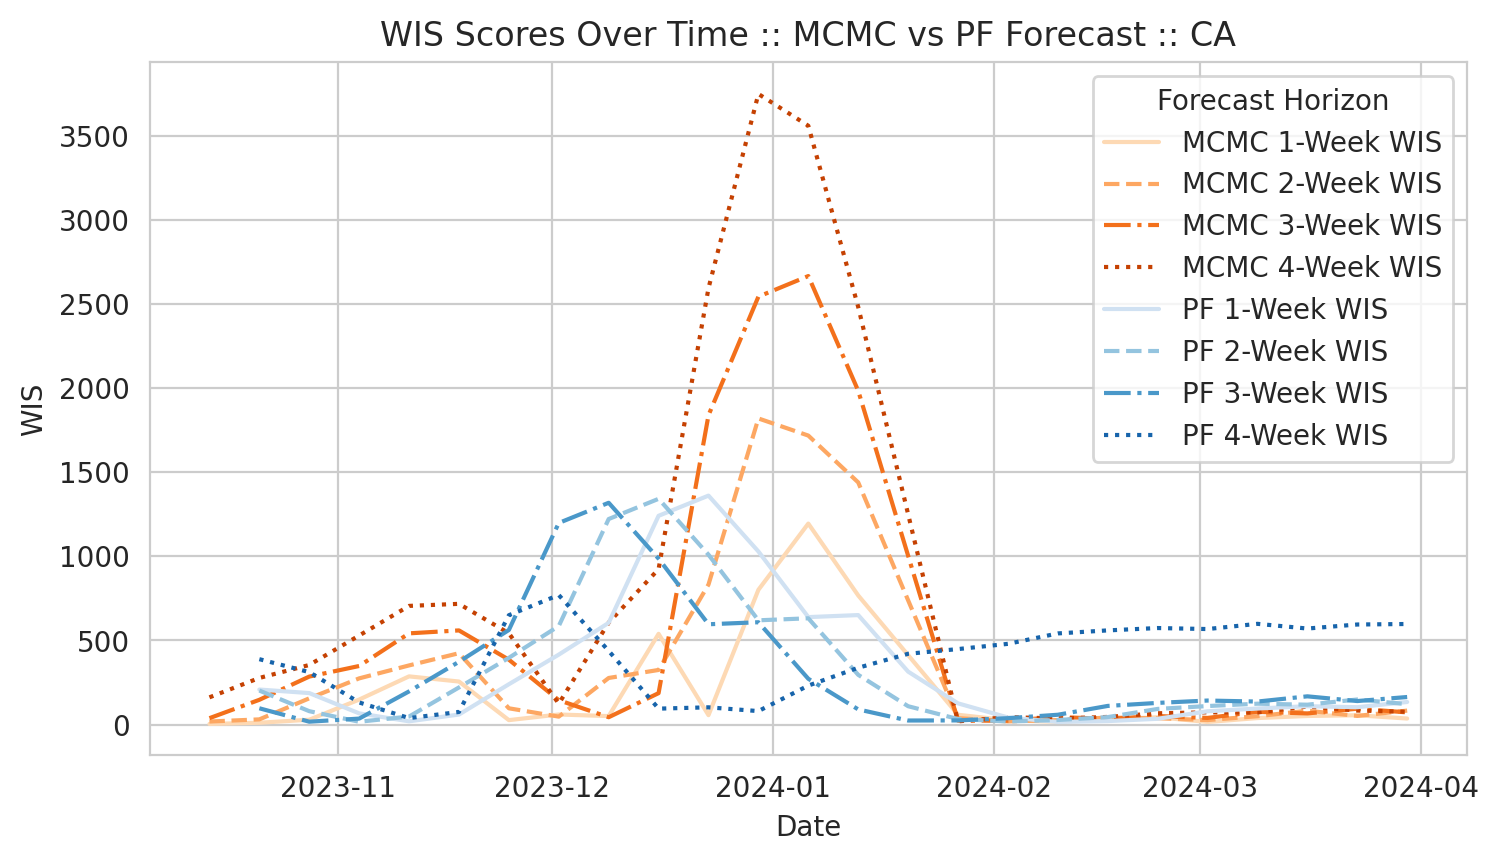

In [10]:
from mcmc_plotting import *

state = 'CA'
plot_state_comparison(mcmc_csv_path=f'./mcmc_accuracy_results/{state}.csv',
                      pf_csv_path=f'./pf_accuracy_results/{state}.csv',
                      save=True)

In [26]:
mcmc_df = pd.read_csv('./mcmc_accuracy_results/CA.csv')
pf_df = pd.read_csv('./pf_accuracy_results/CA.csv')
curve_avg_df = pd.DataFrame(columns=['1wk_WIS', '2wk_WIS', '3wk_WIS', '4wk_WIS'])

for column in mcmc_df.columns:
    if 'WIS' in column:
        curve_avg_df.loc['pf', column] = pf_df[column].mean()
        curve_avg_df.loc['mcmc', column] = mcmc_df[column].mean()
        
        
curve_avg_df

,1wk_WIS,2wk_WIS,3wk_WIS,4wk_WIS
pf,324.5325,317.06625,311.68,399.875417
mcmc,191.255417,344.12,509.574167,747.540417


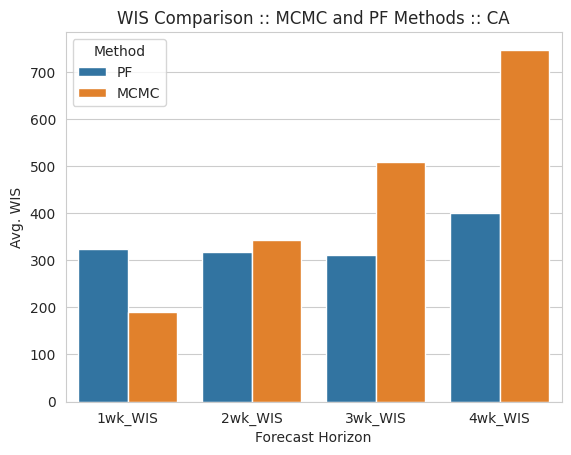

In [21]:
# Transpose the DataFrame to plot the columns as categories
df_transposed = curve_avg_df.T.reset_index()
df_transposed.columns = ['Week', 'PF', 'MCMC']

# Melt the DataFrame for Seaborn
df_melted = df_transposed.melt(id_vars='Week', var_name='Method', value_name='WIS')

# Plot using Seaborn bar plot
sns.barplot(x='Week', y='WIS', hue='Method', data=df_melted)
plt.ylabel('Avg. WIS')
plt.xlabel('Forecast Horizon')
plt.title('WIS Comparison :: MCMC and PF Methods :: CA')
plt.show()

In [24]:
data_folder_path = './mcmc_accuracy_results/'
data_list = []
wis_columns = ["1wk_WIS", "2wk_WIS", "3wk_WIS", "4wk_WIS"]

# Read each CSV file in the directory
for filename in listdir(data_folder_path):
    if filename.endswith(".csv"):
        # Load the data
        file_path = join(data_folder_path, filename)
        data = pd.read_csv(file_path)

        # Convert 'date' column to datetime format
        data["date"] = pd.to_datetime(data["date"])

        for col in wis_columns:
            data[col] = pd.to_numeric(data[col], errors="coerce")

        # Check if any row has all zeros in WIS columns
        # If so, don't append/use it, because that indicates missing data.
        if not (data[wis_columns] == 0).all(axis=1).any():
            data_list.append(data)

# Concatenate all dataframes
combined_data = pd.concat(data_list)

# Group by date and calculate the mean for each WIS
mcmc_average_data = combined_data.groupby("date")[wis_columns].mean().reset_index()
mcmc_average_data.head()

,date,1wk_WIS,2wk_WIS,3wk_WIS,4wk_WIS
0,2023-10-14,8.0854,10.2830,14.5276,26.2080
1,2023-10-21,8.6314,12.9736,23.6798,37.0412
2,2023-10-28,13.5034,24.9488,37.7886,51.0980
3,2023-11-04,18.2306,31.6226,43.8110,71.9588
4,2023-11-11,33.6316,45.8026,73.9778,99.4896


In [25]:
data_folder_path = './pf_accuracy_results/'
data_list = []
wis_columns = ["1wk_WIS", "2wk_WIS", "3wk_WIS", "4wk_WIS"]

# Read each CSV file in the directory
for filename in listdir(data_folder_path):
    if filename.endswith(".csv"):
        # Load the data
        file_path = join(data_folder_path, filename)
        data = pd.read_csv(file_path)

        # Convert 'date' column to datetime format
        data["date"] = pd.to_datetime(data["date"])

        for col in wis_columns:
            data[col] = pd.to_numeric(data[col], errors="coerce")

        # Check if any row has all zeros in WIS columns
        # If so, don't append/use it, because that indicates missing data.
        if not (data[wis_columns] == 0).all(axis=1).any():
            data_list.append(data)

# Concatenate all dataframes
combined_data = pd.concat(data_list)

# Group by date and calculate the mean for each WIS
pf_average_data = combined_data.groupby("date")[wis_columns].mean().reset_index()
pf_average_data.head()

,date,1wk_WIS,2wk_WIS,3wk_WIS,4wk_WIS
0,2023-10-21,274.757500,200.124615,149.135000,124.069423
1,2023-10-28,268.719423,189.103077,145.836923,112.192308
2,2023-11-04,248.358654,178.745000,133.391154,93.037885
3,2023-11-11,326.908462,195.328077,128.846923,82.516923
4,2023-11-18,226.215385,157.354231,116.962500,72.544808


In [28]:
curve_avg_df = pd.DataFrame(columns=['1wk_WIS', '2wk_WIS', '3wk_WIS', '4wk_WIS'])

for column in mcmc_df.columns:
    if 'WIS' in column:
        curve_avg_df.loc['pf', column] = pf_average_data[column].mean()
        curve_avg_df.loc['mcmc', column] = mcmc_average_data[column].mean()

curve_avg_df

,1wk_WIS,2wk_WIS,3wk_WIS,4wk_WIS
pf,241.128558,166.920096,126.372917,107.570192
mcmc,54.500892,96.743,150.675142,224.7631


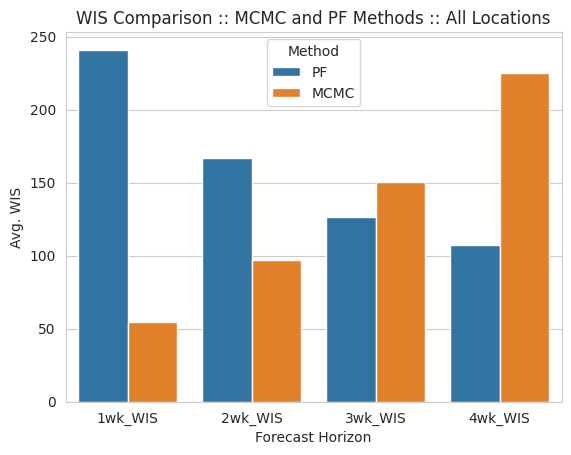

In [30]:
# Transpose the DataFrame to plot the columns as categories
df_transposed = curve_avg_df.T.reset_index()
df_transposed.columns = ['Week', 'PF', 'MCMC']

# Melt the DataFrame for Seaborn
df_melted = df_transposed.melt(id_vars='Week', var_name='Method', value_name='WIS')

# Plot using Seaborn bar plot
sns.barplot(x='Week', y='WIS', hue='Method', data=df_melted)
plt.ylabel('Avg. WIS')
plt.xlabel('Forecast Horizon')
plt.title('WIS Comparison :: MCMC and PF Methods :: All Locations')
plt.show()

In [1]:
import mcmc_plotting

df = mcmc_plotting.calculate_improvement_scores()

In [2]:
df

,state_code,state_abbrev,1wk_WIS_improvement,2wk_WIS_improvement,3wk_WIS_improvement,4wk_WIS_improvement


In [18]:
import os
import pandas as pd

def calculate_improvement_scores():
    pf_folder_path = "./pf_accuracy_results/"
    mcmc_folder_path = "./mcmc_accuracy_results/"
    all_improvements_df = pd.DataFrame()  # Empty DataFrame to store all results
    columns_to_compare = ['1wk_WIS', '2wk_WIS', '3wk_WIS', '4wk_WIS']

    # Loop through all the files
    for filename in os.listdir(mcmc_folder_path):
        # Load the PF and MCMC DataFrames
        mcmc_df = pd.read_csv(mcmc_folder_path + filename)
        pf_df = pd.read_csv(pf_folder_path + filename)

        # Ensure the 'date' columns are datetime for both DataFrames
        mcmc_df['date'] = pd.to_datetime(mcmc_df['date'])
        pf_df['date'] = pd.to_datetime(pf_df['date'])

        # Merge the two DataFrames on 'date', 'state_code', 'state_abbrev'
        merged_df = pd.merge(pf_df, mcmc_df, on=['state_code', 'state_abbrev', 'date'], suffixes=('_pf', '_mcmc'))
        if filename == 'AZ.csv':
            print(merged_df.head())
        # Create an empty dictionary to store the sum-based improvement for this file
        improvement_dict = {
            'state_code': merged_df['state_code'].iloc[0],
            'state_abbrev': merged_df['state_abbrev'].iloc[0],
            'filename': filename
        }

        # Calculate the improvement as the sum of PF column - sum of MCMC column / sum of MCMC column for each WIS column
        for col in columns_to_compare:
            sum_pf = merged_df[col + '_pf'].sum()
            sum_mcmc = merged_df[col + '_mcmc'].sum()
            improvement_score = (sum_pf - sum_mcmc) / sum_mcmc * 100
            improvement_dict[col + '_improvement'] = improvement_score

        # Convert the improvement dictionary to a DataFrame and concatenate it
        improvement_df = pd.DataFrame([improvement_dict])
        all_improvements_df = pd.concat([all_improvements_df, improvement_df], ignore_index=True)

    return all_improvements_df

improvements = calculate_improvement_scores()
improvements

   state_code state_abbrev       date  1wk_WIS_pf  2wk_WIS_pf  3wk_WIS_pf  \
0           4           AZ 2023-10-21     1881.53     1377.13      961.05   
1           4           AZ 2023-10-28     1879.53     1296.13      902.05   
2           4           AZ 2023-11-04     1198.96      842.47      574.53   
3           4           AZ 2023-11-11     5419.93     2075.93      806.27   
4           4           AZ 2023-11-18      569.54      504.74      314.78   

   4wk_WIS_pf  avg_wis_pf  1wk_WIS_mcmc  2wk_WIS_mcmc  3wk_WIS_mcmc  \
0      394.25   1153.4900         21.74         22.58        111.31   
1      373.25   1112.7400         23.74        103.58        170.31   
2      175.95    697.9775         75.20        125.27        134.32   
3       98.76   2100.2225        134.20        146.27        201.32   
4       48.62    359.4200         66.38         95.74        159.46   

   4wk_WIS_mcmc  avg_wis_mcmc  
0        160.54       79.0425  
1        181.54      119.7925  
2        188.6

,state_code,state_abbrev,filename,1wk_WIS_improvement,2wk_WIS_improvement,3wk_WIS_improvement,4wk_WIS_improvement
0,2,AK,AK.csv,-27.261206,-56.774697,-69.734578,-84.951535
1,1,AL,AL.csv,119.486945,16.974128,-28.911243,-15.131554
2,5,AR,AR.csv,108.630602,30.329846,-12.092258,-27.366693
3,4,AZ,AZ.csv,906.519754,215.451038,28.376252,-51.922630
4,6,CA,CA.csv,62.957876,-8.982472,-38.841490,-48.386505
5,8,CO,CO.csv,735.070982,224.471507,29.069647,-69.598377
6,9,CT,CT.csv,8.321314,-45.275559,-69.278198,-80.111240
7,11,DC,DC.csv,-5.480891,-52.833969,-73.580240,-86.283233
8,10,DE,DE.csv,21.880632,-43.452276,-63.934358,-65.005356
9,12,FL,FL.csv,95.654026,41.807966,10.973996,-35.111339


In [19]:
avg_improvements = {}
for column in improvements:
    if 'WIS' in column:
        avg_improvements[column] = improvements[column].mean()
        
print(avg_improvements)

{'1wk_WIS_improvement': 280.4998020772977, '2wk_WIS_improvement': 51.981879617189215, '3wk_WIS_improvement': -21.989230447011224, '4wk_WIS_improvement': -54.09447438899675}


In [20]:
for key, value in avg_improvements.items():
    avg_improvements[key] = -value

avg_improvements

{'1wk_WIS_improvement': -280.4998020772977,
 '2wk_WIS_improvement': -51.981879617189215,
 '3wk_WIS_improvement': 21.989230447011224,
 '4wk_WIS_improvement': 54.09447438899675}

In [23]:
avg_improvements_df = pd.DataFrame([avg_improvements])


In [24]:
avg_improvements_df.to_csv('./avg_improvements.csv')